***Importing Packages***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
raw_data = yf.download(tickers='AAPL', period='5y')

[*********************100%***********************]  1 of 1 completed


***Importing and preprocessing the data***

In [3]:
raw_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-12-22,29.087500,29.127501,28.910000,29.072500,27.365412,104343600
2016-12-23,28.897499,29.129999,28.897499,29.129999,27.419540,56998000
2016-12-27,29.129999,29.450001,29.122499,29.315001,27.593674,73187600
2016-12-28,29.379999,29.504999,29.049999,29.190001,27.476017,83623600
2016-12-29,29.112499,29.277500,29.100000,29.182501,27.468958,60158000
...,...,...,...,...,...,...
2021-12-15,175.110001,179.500000,172.309998,179.300003,179.300003,131063300
2021-12-16,179.279999,181.139999,170.750000,172.259995,172.259995,150185800
2021-12-17,169.929993,173.470001,169.690002,171.139999,171.139999,195432700


In [4]:
df = raw_data.copy()

In [5]:
df.to_csv('aapl.csv')

In [6]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

***Analyzing the data***

<AxesSubplot:xlabel='Date'>

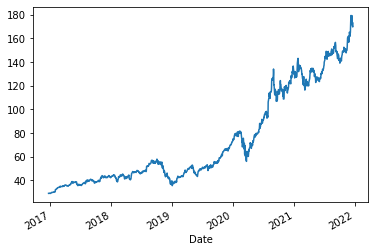

In [7]:
df.Close.plot()

In [8]:
df = df.drop('Volume', axis=1)

***Splitting into train and test data***

In [9]:
size = int(len(df)*0.8)
df_train = df[:size]
df_test = df[size:]

In [10]:
df_train.head()

,Open,High,Low,Close,Adj Close
Date,,,,,
2016-12-22,29.087500,29.127501,28.910000,29.072500,27.365412
2016-12-23,28.897499,29.129999,28.897499,29.129999,27.419540
2016-12-27,29.129999,29.450001,29.122499,29.315001,27.593674
2016-12-28,29.379999,29.504999,29.049999,29.190001,27.476017
2016-12-29,29.112499,29.277500,29.100000,29.182501,27.468958


***Visualizing the linear relationship between Open, High, Low prices and Close price***

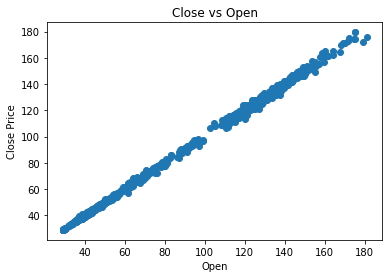

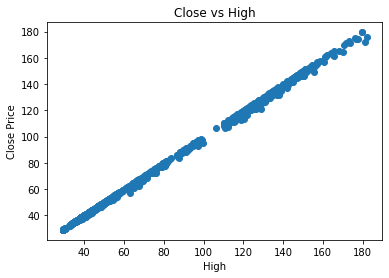

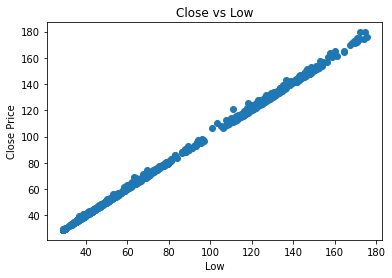

In [11]:
for i in range(0,3):
    plt.scatter(df[df.columns[i]], df.Close)
    plt.xlabel(df.columns[i])
    plt.ylabel('Close Price')
    plt.title('Close vs '+df.columns[i])
    plt.show()
    

***Splitting Input and Output data***

In [12]:
X_train = df_train.drop('Close',axis=1)
y_train = df_train['Close']
X_test = df_test.drop('Close',axis=1)
y_test = df_test['Close']

In [13]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [14]:
reg.fit(X_train, y_train)

LinearRegression()

***Verifying the score***

In [15]:
reg.score(X_test, y_test)

0.9995164118831177

In [16]:
pred = reg.predict(X_test)

In [17]:
X_test.head()

,Open,High,Low,Adj Close
Date,,,,
2020-12-22,131.610001,134.410004,129.649994,131.071960
2020-12-23,132.160004,132.429993,130.779999,130.157608
2020-12-24,131.320007,133.460007,131.100006,131.161407
2020-12-28,133.990005,137.339996,133.509995,135.852509
2020-12-29,138.050003,138.789993,134.339996,134.043640


In [18]:
df_test['Prediction'] = pred

C:\Users\rames\anaconda3\envs\newenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


***Plotting the Actual Close price against the predicted one***

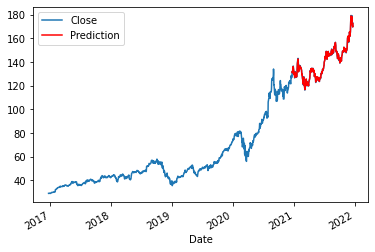

In [19]:
df.Close.plot()
df_test.Prediction.plot(color='r')
plt.legend()
plt.show()

Inference: Considering the score of 99.95% and the predicted price overlaps the actual price, it seemed to be overfitting the data using linear regression.

In [20]:
rmse = np.sqrt(np.mean((pred-y_test)**2))
rmse

0.29168262386415017